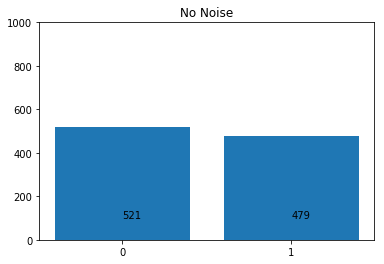

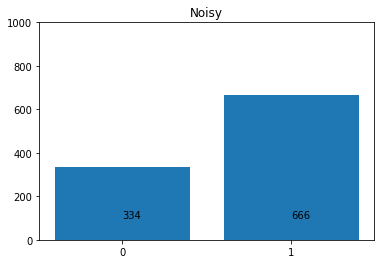

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

'''Code taken from Error Calculation for machine learning purposes.'''


def run(G, E, vec, n=1000):
    ''' - Computes orthogonal matrix from E, and adds that as noise to the transformation gat G.
        - creates lists of n measures of the non-noisy and noisy transformation'''
    GE, r = np.linalg.qr(G+E)
    #print('orthogonal G+E:\n', GE)

    ideal = np.matmul(G,vec)
    noisy = np.matmul(GE,vec)
    #print('Ideal vec:\n', ideal)
    #print('Noisy vec:\n',noisy)

    m0 = 0 # number of zeros
    for i in range(n):
        prob0 = np.cos(np.arctan(ideal[0]/ideal[1]))**2
        r = np.random.random()
        if prob0 <= r:
            m0 += 1

    m0_noisy = 0
    for i in range(n):
        prob0 = np.cos(np.arctan(noisy[0]/noisy[1]))**2
        r = np.random.random()
        if prob0 <= r:
            m0_noisy += 1
    
    return m0, m0_noisy, n

            
def plot(p0, p0_noisy, n):
    '''Plots two histograms of noisy and non-noisy distributions'''
    
    fig1 = plt.figure()
    p1 = n - p0
    plt.bar([0,1], [p0, p1])
    plt.text(0,n/10,'{}'.format(p0))
    plt.text(1,n/10,'{}'.format(p1))
    plt.ylim(0,n)
    plt.xticks([0,1], [0, 1])
    plt.title("No Noise")
    
    fig2 = plt.figure()
    p1_noisy = n - p0_noisy
    plt.bar([0,1], [p0_noisy, p1_noisy])
    plt.text(0,n/10,'{}'.format(p0_noisy))
    plt.text(1,n/10,'{}'.format(p1_noisy))
    plt.ylim(0,n)
    plt.xticks([0,1], [0,1])
    plt.title("Noisy")
    
########## Main ###########

# input vector
vec = np.array([[1],
                [0]])

# error matrix
E = np.array([[0.1, 0.3],
              [0.5, 0.2]])

# Pauli X
PX = np.array([[0,1],
               [1,0]])

# Hadamard
H = np.array([[1/np.sqrt(2),1/np.sqrt(2)],
              [1/np.sqrt(2),-1/np.sqrt(2)]])

#           Gate, Error, vector, number of trials
p0, p0_noisy, n = run(H, E, vec, 1000)
plot(p0, p0_noisy, n)



In [2]:
'''- Uses Hadamard gate and random values of a and b to produce an array for machine learning.
   - feature_vectors = [a, b, proportion of zeros]
   - with current config, correct proportion of zeros is 0.5'''

'''Code taken from Error Calculation for machine learning purposes.'''

vec = np.array([[1],
                [0]])

# Hadamard gate
H = np.array([[1/np.sqrt(2),1/np.sqrt(2)],
              [1/np.sqrt(2),-1/np.sqrt(2)]])


# Correct ideal proportion of zeros with current gate and vector
ideal = np.matmul(H,vec)
cp0 = (np.cos(np.arctan(ideal[0]/ideal[1]))**2)[0]

n_vectors = 500
feature_vectors = np.zeros((n_vectors, 3))

for nv in range(n_vectors):
    a = np.random.uniform(-1,1)
    b = np.random.uniform(-1,1)
    E = np.array([[a, b],
                  [b, a]])
    p0, p0_noisy, n = run(H, E, vec, 1000)
    feature_vectors[nv,0] = a
    feature_vectors[nv,1] = b
    feature_vectors[nv,2] = (p0/1000) # proportion we got
    
feature_vectors
    

array([[ 0.24393303, -0.88259116,  0.494     ],
       [ 0.46246614,  0.47490391,  0.532     ],
       [ 0.84069552, -0.78369763,  0.487     ],
       ...,
       [-0.65835988, -0.63645325,  0.505     ],
       [ 0.40851687,  0.49062879,  0.501     ],
       [-0.91324539, -0.4949125 ,  0.496     ]])

In [3]:
from sklearn.neural_network import MLPRegressor as nn
from sklearn.model_selection import train_test_split

#Splits up the data into training and testing sets

np.random.shuffle(feature_vectors)
test, train = train_test_split(feature_vectors)

test_x = test[:, 0:2]
test_y = test[:, 2]
train_x = train[:,0:2]
train_y = train[:, 2]


#Setting up the neural network
Error_Prediction = nn(max_iter = 1000)
Error_Prediction.fit(train_x, train_y)

#comparing predictions to actual values
predict = Error_Prediction.predict(test_x)
for x in range(len(test_x)):
    
    print("The predicted error is: ", predict[x])
    print("The actual error is: ", test_y[x])
    print("")

The predicted error is:  0.5157803687425928
The actual error is:  0.5

The predicted error is:  0.4466277142759207
The actual error is:  0.501

The predicted error is:  0.5336378485681459
The actual error is:  0.485

The predicted error is:  0.5147788334177799
The actual error is:  0.509

The predicted error is:  0.48279965820453635
The actual error is:  0.493

The predicted error is:  0.551057193785019
The actual error is:  0.52

The predicted error is:  0.4553371944373185
The actual error is:  0.494

The predicted error is:  0.48943924746912676
The actual error is:  0.478

The predicted error is:  0.4939430050378287
The actual error is:  0.507

The predicted error is:  0.47435533326358464
The actual error is:  0.484

The predicted error is:  0.5294725784983481
The actual error is:  0.504

The predicted error is:  0.44757798146243055
The actual error is:  0.519

The predicted error is:  0.4374025850317066
The actual error is:  0.473

The predicted error is:  0.5084937901288475
The act

In [4]:
#Computing R^2 for which the best possible score is 1.0 and it can be negative.
print("The  coefficient of determination R^2 was: ", Error_Prediction.score(test_x, test_y))

The  coefficient of determination R^2 was:  -5.752533142287324


Text(0.5,0,'Percentage Zeros')

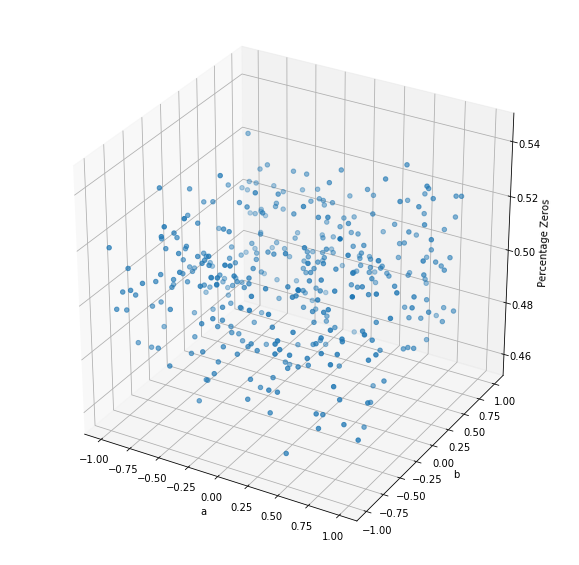

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(test_x[:,0], test_x[:,1], test_y)
ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('Percentage Zeros')

Text(0.5,0,'Percentage Zeros')

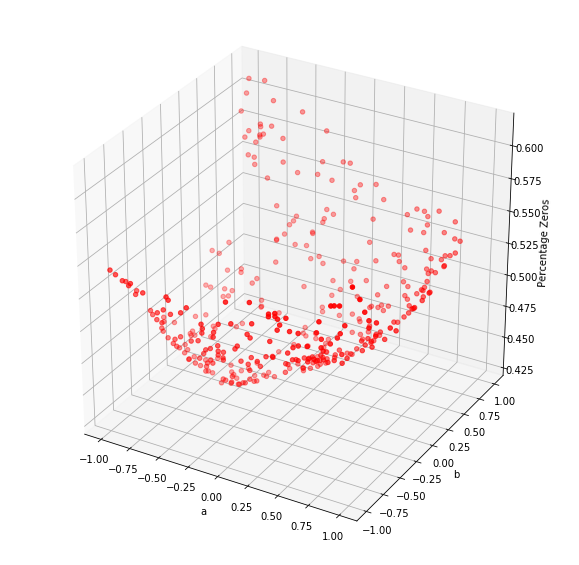

In [6]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(test_x[:,0], test_x[:,1], predict, c = 'r')
ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('Percentage Zeros')

In [ ]:
class Quantum_Noise():
    
    def __init__(self, G, vec, n):
        self.G = G
        self.vec = vec
        self.n = n
        
        a = random.uniform(-1,1)
        b = random.uniform(-1,1)
        self. E = 
        